In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


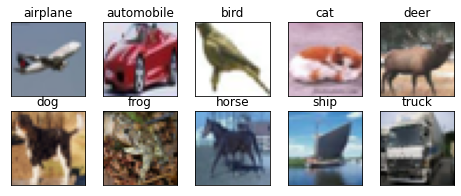

In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'], color="dodgerblue")
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'], color="green")
    axs[0].set_ylim(0, 1)
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'], color="darkorange")
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'], color="red")
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [6]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            #  featurewise_center=True,
                            #  featurewise_std_normalization=True,
                             rotation_range=10.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             zoom_range=0.1,
                             shear_range=0.1,
                             fill_mode='nearest')
datagen.fit(X_train)

Definición de una red convolucional multicapa

In [7]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D
import keras.backend as K
from keras.callbacks import ModelCheckpoint

checkpoint_path = "/gdrive/My Drive/Colab Notebooks/MUIA-ComputerVision/P4/Alberto_CIFAR10CNN1/best_epoch_val_acc.ckpt"
checkpoint_callback = ModelCheckpoint(
   checkpoint_path, monitor='val_accuracy', verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq='epoch',mode='auto',save_best_only=True)

learning_rate=0.001
epochs=500
batch_size=256
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=int(epochs*0.2) )
p_dropou_layert=[0,0.2,0.3,0.5]
i=0
d_augm=1

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D( pool_size=(2, 2)))
model.add(Dropout(p_dropou_layert[i]))
i+=1
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(p_dropou_layert[i]))
i+=1
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(p_dropou_layert[i]))
i+=1
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
model.add(Dropout(p_dropou_layert[i]))
i+=1
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=num_classes, kernel_size=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Activation('softmax'))

# opt = optimizers.SGD(lr=learning_rate, momentum=0.9, nesterov=True)
opt = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [8]:
# Training
if d_augm==1:
  # Fit the model with real time data augmentation
  print("Fitting model with data augmentation")
  start = time()
  history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size), 
                           epochs=epochs, verbose=2, validation_data=(X_test, Y_test), callbacks=[tensorboard, es,checkpoint_callback])
  end = time()

else:
  # Fit the model with plain dataset 
  print("Fitting model")
  start = time()
  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test), callbacks=[tensorboard, es, checkpoint_callback])
  end = time()

Fitting model with data augmentation
Epoch 1/500
196/196 - 33s - loss: 1.7607 - accuracy: 0.4047 - val_loss: 3.6903 - val_accuracy: 0.1000

Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to /gdrive/My Drive/Colab Notebooks/MUIA-ComputerVision/P4/Alberto_CIFAR10CNN1/best_epoch_val_acc.ckpt
Epoch 2/500
196/196 - 24s - loss: 1.2237 - accuracy: 0.5575 - val_loss: 2.3818 - val_accuracy: 0.3017

Epoch 00002: val_accuracy improved from 0.10000 to 0.30170, saving model to /gdrive/My Drive/Colab Notebooks/MUIA-ComputerVision/P4/Alberto_CIFAR10CNN1/best_epoch_val_acc.ckpt
Epoch 3/500
196/196 - 24s - loss: 1.0069 - accuracy: 0.6440 - val_loss: 1.1037 - val_accuracy: 0.6463

Epoch 00003: val_accuracy improved from 0.30170 to 0.64630, saving model to /gdrive/My Drive/Colab Notebooks/MUIA-ComputerVision/P4/Alberto_CIFAR10CNN1/best_epoch_val_acc.ckpt
Epoch 4/500
196/196 - 23s - loss: 0.8802 - accuracy: 0.6919 - val_loss: 0.8553 - val_accuracy: 0.7177

Epoch 00004: val_accuracy 

Training CNN took 5831.713987112045 seconds


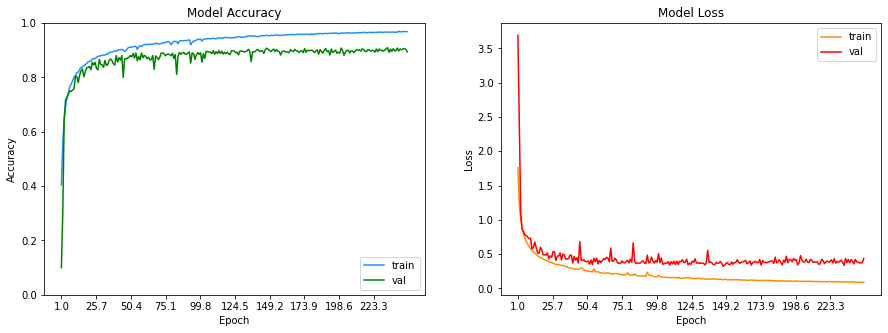

In [9]:
print("Training CNN took " + str(end - start) + " seconds")
plot_model_history(history)

In [10]:
start = time()
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('For final weights configuration:\n\tTest loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

CNN took 1.297666072845459 seconds
For final weights configuration:
	Test loss: 0.4375062882900238 - Accuracy: 0.8938000202178955


In [11]:
model.load_weights(checkpoint_path)
start = time()
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('For best validation accuracy weights configuration found in training:\n\tTest loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

CNN took 1.2773823738098145 seconds
For best validation accuracy weights configuration found in training:
	Test loss: 0.3355124890804291 - Accuracy: 0.9093999862670898
